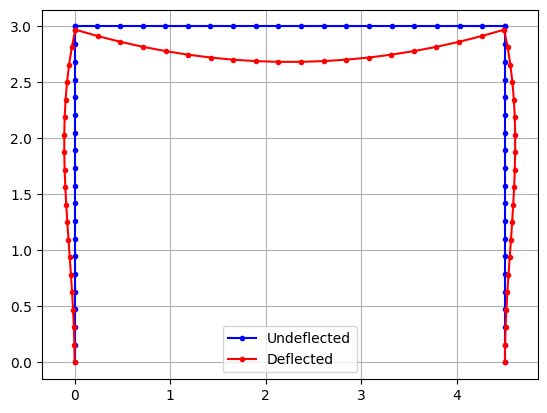

In [6]:
from FEA.FEA import *
import numpy as np
import matplotlib.pyplot as plt


I = 1e-5
A = 5e-4
E = 200e9
L_1 = 3
L_2 = 4.5
L_3 = 3
angle_1 = 90
angle_2 = 0
angle_3 = -90

A_1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = Element(A_1, E, I, L_1, A, angle_1)
element2 = Element(A_2, E, I, L_2, A, angle_2, UDL=-10e3, point_load=(L_2 / 2, 0, 50e3, 1, -1))
element3 = Element(A_3, E, I, L_3, A, angle_3)

Q = np.zeros((6, 1))

structure = Structure([element1, element2, element3], Q)

structure.solve()

nodes = np.array([
    [[0, 0], [0, 3]],
    [[0, 3], [4.5, 3]],
    [[4.5, 3], [4.5, 0]]
])

structure.plot_structure(nodes, 20, 20)